In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from functools import reduce # for merging dataframes
import re
import os

In [4]:
df = pd.read_csv("Data\output_1.csv")

In [5]:
df.head()

,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,Thickness profile,...,M_Al,B,N,Ti,Cr,V,Mo,Constriction_width,analyse_value,is_constriction
0,283801,NaN,KN4,11395,119,1546.216667,NaN,NaN,4.23050,NaN,...,363,1,41,14,153,0,2,0,1,0
1,283802,NaN,KN4,11446,119,1544.633333,NaN,NaN,4.38275,NaN,...,317,1,34,11,166,0,3,0,1,0
2,283803,NaN,KN3,11304,118,1554.183333,NaN,NaN,3.58925,NaN,...,329,1,28,23,258,0,22,0,1,0
3,283804,NaN,KN2,10785,113,1528.283333,NaN,NaN,4.36900,NaN,...,392,1,57,16,243,0,31,0,1,0
4,283806,NaN,KT7,12389,129,1448.083333,NaN,NaN,5.05000,NaN,...,311,1,51,241,174,0,17,0,1,0


In [6]:
# list of unique with 'no' constriction
df[df.is_constriction == 0 ].analyse.unique()

array(['KN4', 'KN3', 'KN2', 'KT7', 'LK4', 'KT3', 'KM5', 'KR5', 'KN5',
       'L65', 'L50', 'KM4', 'KM8', 'LK2', 'LK6', 'KM3', 'L51', 'L62',
       'LM4', 'LT4', 'K37', 'K21', 'K13', 'K82', 'K35', 'KT2', 'KN7',
       'K20', 'T27', 'T21', 'K32', 'TB5', 'K17', 'K58', 'KB3', 'T23',
       'K11', 'TB0', 'TB6', 'K45', 'NB0', 'KK0', 'KK8', 'K44', 'L85',
       'LK5', 'KM7', 'KK1', 'K10', 'L47', 'KM2', 'L76', 'K39', 'LM5',
       'KT9', 'KM9', 'KT6', 'LT7', 'T25', 'K46', 'N71', 'KT1', 'L97',
       'K14', 'K15', 'KK5', 'L63', 'L78', 'L74', 'KK7', 'LK9', 'T26',
       'T22', 'K71', 'K27', 'K40', 'L67', 'K57', 'L71', 'L95', 'TB4',
       'K38', 'T69', 'L72', 'LK7', 'TB3', 'T28', 'KT5', 'KK2', 'L86',
       'K36', 'KN1', 'K69', 'L92', 'K34', 'K99', 'TB2'], dtype=object)

In [7]:
# list of unique with 'yes' constriction
df[df.is_constriction == 1 ].analyse.unique()

array(['LT7', 'K37', 'K20', 'T23', 'T21', 'K21', 'K32', 'K13', 'KT1',
       'NB0', 'K35', 'K45', 'LT4', 'K17', 'K58', 'KM4', 'LK6', 'K10',
       'KB3', 'K27', 'KK5', 'LK1', 'L97', 'K44', 'K82', 'LK4', 'L63',
       'L78', 'KT3', 'K39', 'KT7', 'LM4', 'T26', 'L74', 'TB5', 'NB9',
       'TB6', 'K40', 'T27', 'KN7', 'KN4', 'KM8', 'L71', 'L62', 'K57',
       'K11', 'T22', 'KN2', 'L65', 'LK2', 'KN3', 'KT2', 'KM5', 'L95',
       'LK7', 'TB4', 'T69', 'K46', 'L50', 'KK2', 'L86', 'KN5', 'L67',
       'L47', 'LK5', 'K71', 'N71', 'TB0', 'KT5', 'KM2', 'KK0', 'LM5',
       'T28', 'L85', 'KT6', 'KK8', 'K38', 'L72'], dtype=object)

In [8]:
# list of unique along with value count for 'yes' constriction
df[df.is_constriction == 1 ].analyse.value_counts()

K37    258
K35    163
K21    154
T21     93
K32     91
      ... 
TB0      1
L95      1
L47      1
L67      1
K40      1
Name: analyse, Length: 78, dtype: int64

<AxesSubplot: >

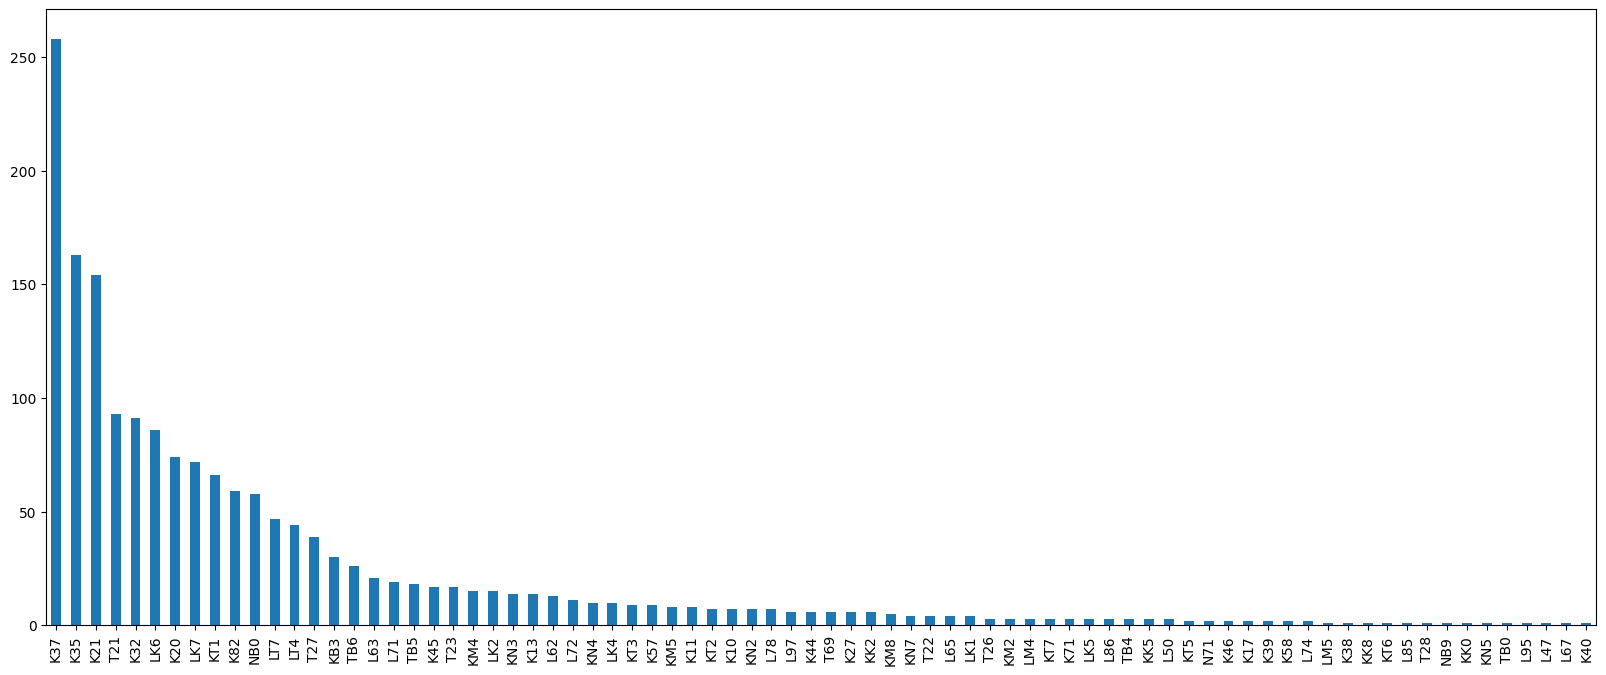

In [9]:
# plot for unique along with value count for 'yes' constriction
plt.figure(figsize=(20,8))
df[df.is_constriction == 1 ].analyse.value_counts().plot(kind='bar')

In [10]:
# all unique vales in our data 
uniqueValues = df.nunique()
uniqueValues

coil                                 20570
furnace Number                           0
analyse                                 99
Hardness_1                            2921
Hardness_2                              76
Width                                15603
Temperature before finishing mill        0
Temperature after finishing mill         0
Thickness                             9928
Thickness profile                        0
C                                     1031
Mn                                    3548
Si                                    1082
Nb                                     450
P                                      461
S                                      229
Al                                     647
M_Al                                   644
B                                       25
N                                       83
Ti                                     578
Cr                                     857
V                                       69
Mo         

In [11]:
# Preprocess DataFrame for further analysis 
stats_df = df.drop(['coil','analyse','furnace Number', 'Temperature before finishing mill',
       'Temperature after finishing mill','Thickness profile','Constriction_width','analyse_value'], axis=1)
stats_df.head()

,Hardness_1,Hardness_2,Width,Thickness,C,Mn,Si,Nb,P,S,Al,M_Al,B,N,Ti,Cr,V,Mo,is_constriction
0,11395,119,1546.216667,4.23050,632,3322,124,263,142,60,381,363,1,41,14,153,0,2,0
1,11446,119,1544.633333,4.38275,627,3484,114,260,154,48,329,317,1,34,11,166,0,3,0
2,11304,118,1554.183333,3.58925,625,2334,205,202,183,47,345,329,1,28,23,258,0,22,0
3,10785,113,1528.283333,4.36900,386,2317,149,130,177,99,401,392,1,57,16,243,0,31,0
4,12389,129,1448.083333,5.05000,707,9188,73,384,150,56,344,311,1,51,241,174,0,17,0


In [12]:
# null values
stats_df.isnull().sum()

Hardness_1         0
Hardness_2         0
Width              0
Thickness          0
C                  0
Mn                 0
Si                 0
Nb                 0
P                  0
S                  0
Al                 0
M_Al               0
B                  0
N                  0
Ti                 0
Cr                 0
V                  0
Mo                 0
is_constriction    0
dtype: int64

<AxesSubplot: >

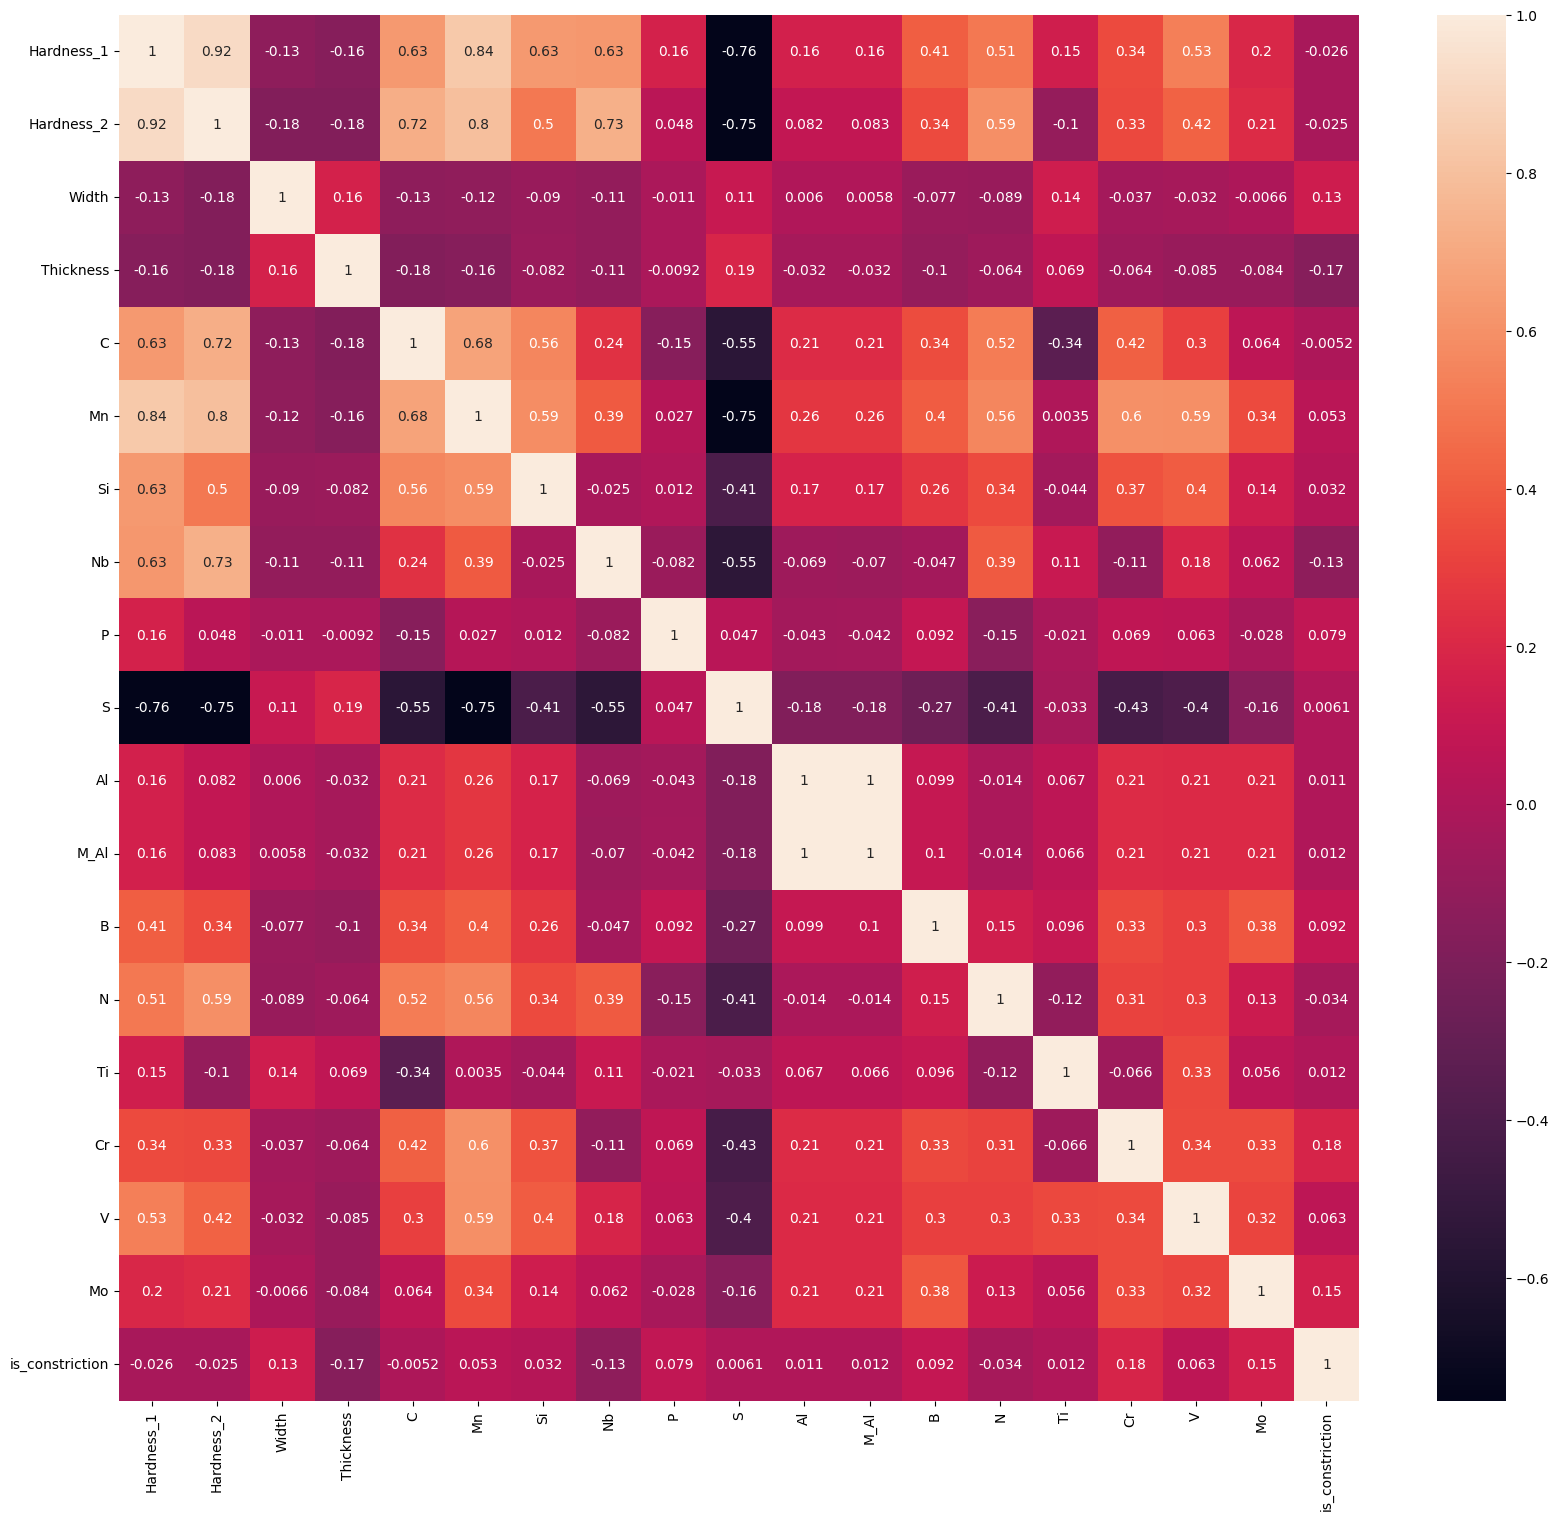

In [13]:
# to check corelation
stats_df_corr = stats_df.corr()
fig, ax = plt.subplots(figsize=(20, 18))

sns.heatmap(stats_df_corr, annot=True)

<AxesSubplot: xlabel='variable', ylabel='value'>

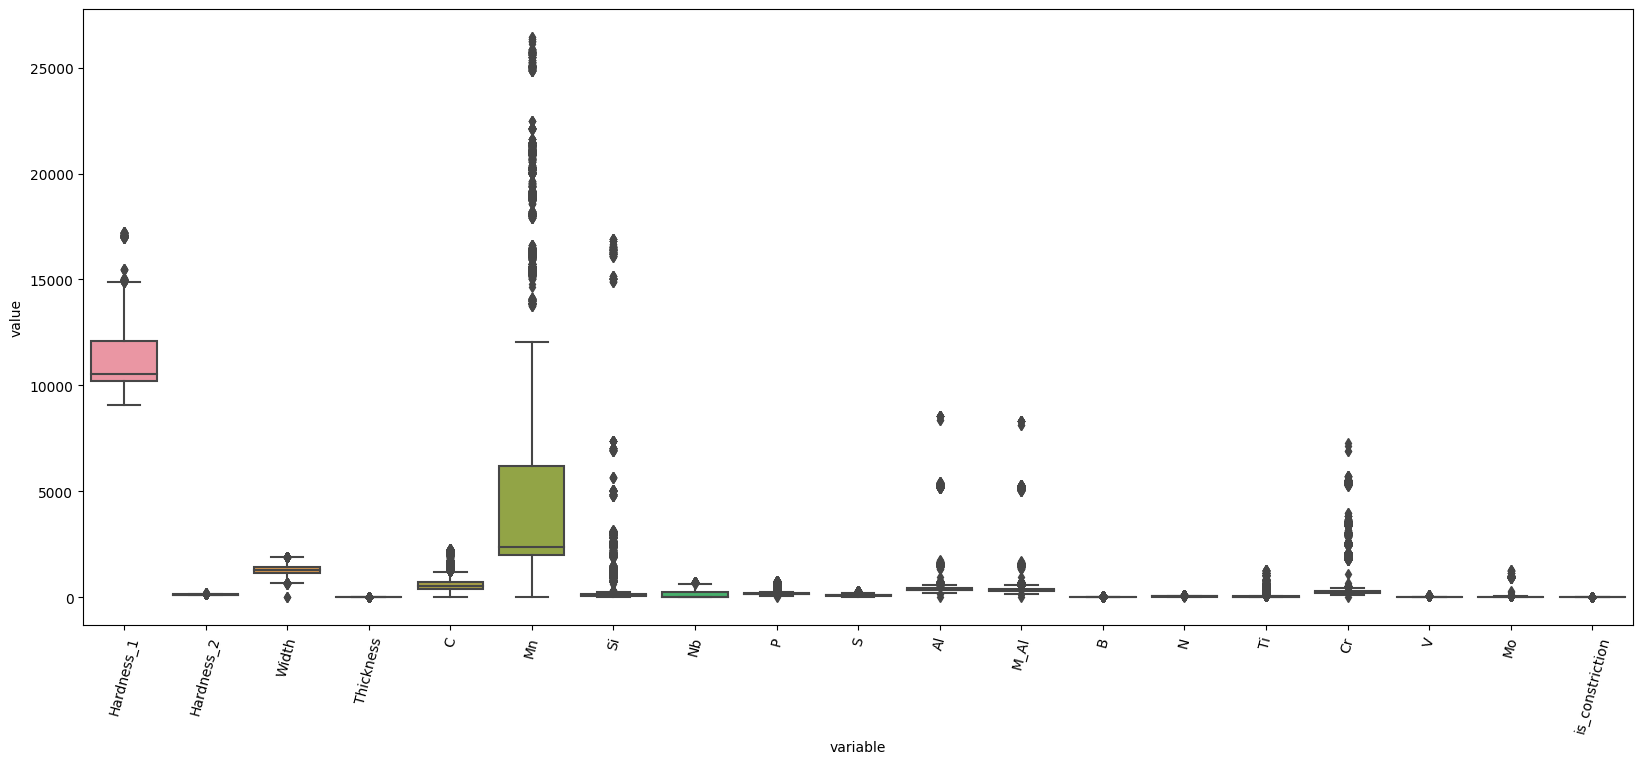

In [14]:
# to plot outliers in our data set
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.figure(figsize=(20,8))
plt.xticks(rotation=75)
sns.boxplot(x="variable", y="value", data=pd.melt(stats_df))

In [15]:
#normalized_df2 = pd.DataFrame(normalize,(df,norm=L2"L2",columns=df.columns))

In [16]:
# Normaliz data set
normalized_df=(stats_df-stats_df.mean())/stats_df.std()

<AxesSubplot: xlabel='variable', ylabel='value'>

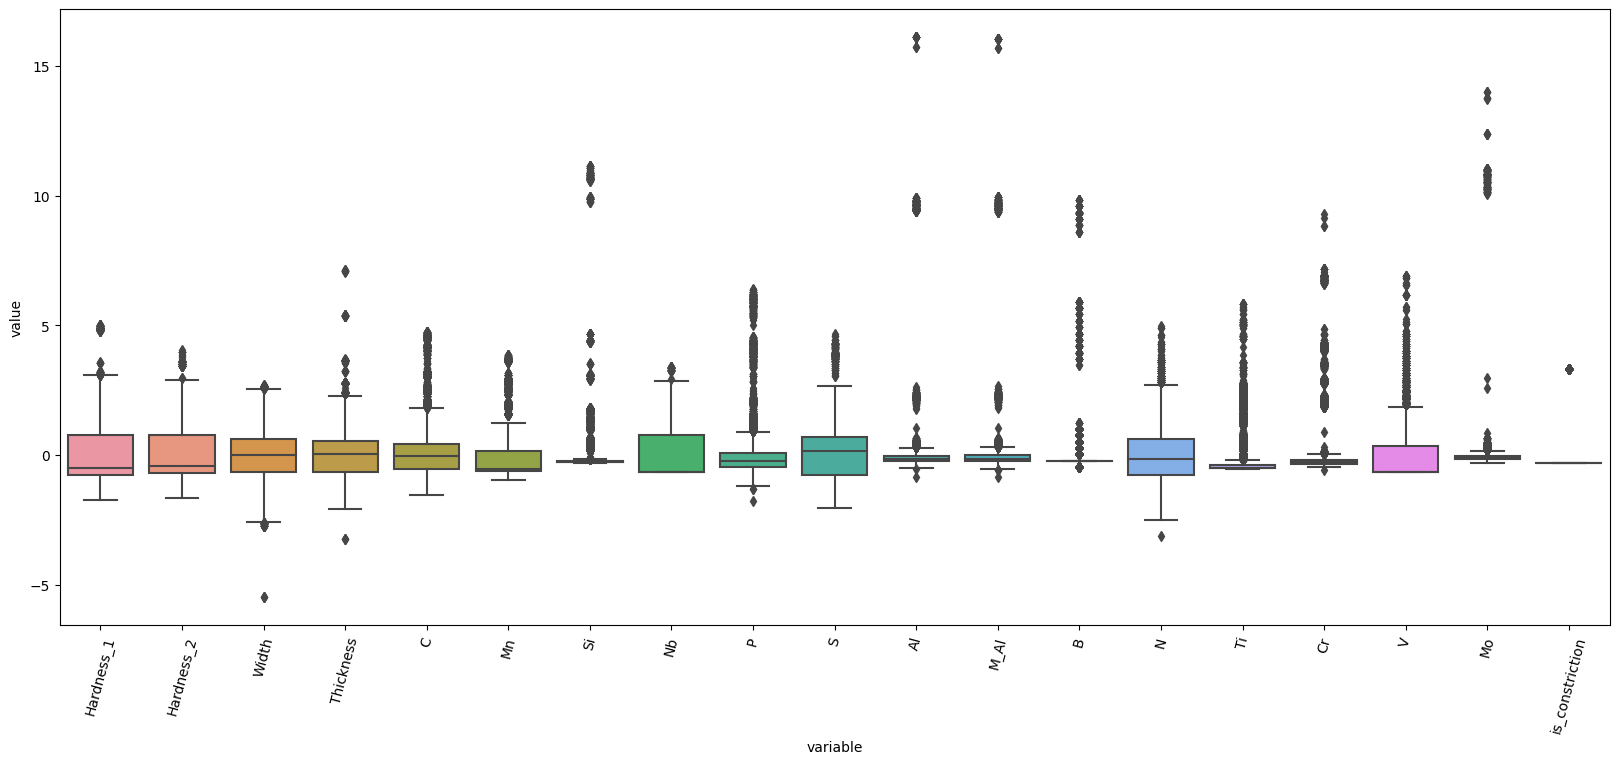

In [17]:
# To plot outliers in our normaliz data set
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.figure(figsize=(20,8))
plt.xticks(rotation=75)
sns.boxplot(x="variable", y="value", data=pd.melt(normalized_df))

In [18]:
# stats about normalize data
normalized_df.describe()

,Hardness_1,Hardness_2,Width,Thickness,C,Mn,Si,Nb,P,S,Al,M_Al,B,N,Ti,Cr,V,Mo,is_constriction
count,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,20570.000000,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04,2.057000e+04
mean,3.177926e-17,4.835974e-17,-1.188268e-16,-5.526827e-17,1.050097e-16,2.487072e-17,-2.487072e-17,-1.050097e-16,-9.395606e-17,1.588963e-16,0.000000,2.210731e-17,-3.316096e-17,3.260828e-16,-1.105365e-17,2.348902e-17,3.316096e-17,-1.381707e-17,2.072560e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.714995e+00,-1.640113e+00,-5.472047e+00,-3.245304e+00,-1.554251e+00,-9.686473e-01,-3.168878e-01,-6.407098e-01,-1.751796e+00,-2.041330e+00,-0.838898,-8.265728e-01,-4.660948e-01,-3.100282e+00,-5.385716e-01,-5.670363e-01,-6.632453e-01,-3.020090e-01,-3.025422e-01
25%,-7.700632e-01,-7.039700e-01,-6.617353e-01,-6.427018e-01,-5.183686e-01,-6.055399e-01,-2.755847e-01,-6.407098e-01,-4.407712e-01,-7.644496e-01,-0.219709,-2.204304e-01,-2.209386e-01,-7.558947e-01,-4.941421e-01,-3.276375e-01,-6.632453e-01,-1.659143e-01,-3.025422e-01
50%,-4.852665e-01,-4.365006e-01,-1.166812e-02,2.690173e-02,-4.637365e-02,-5.348748e-01,-2.586571e-01,-6.407098e-01,-2.151029e-01,1.542109e-01,-0.142311,-1.433956e-01,-2.209386e-01,-1.480908e-01,-4.793323e-01,-2.677878e-01,-6.632453e-01,-1.092082e-01,-3.025422e-01
75%,7.691555e-01,7.671121e-01,6.286523e-01,5.476806e-01,4.116982e-01,1.618123e-01,-2.261563e-01,7.752923e-01,9.653422e-02,7.088738e-01,-0.017282,-1.365272e-02,-2.209386e-01,6.333715e-01,-3.756635e-01,-1.848144e-01,3.657199e-01,-2.981964e-02,-3.025422e-01
max,5.001595e+00,4.043613e+00,2.716201e+00,7.137967e+00,4.747369e+00,3.867299e+00,1.113967e+01,3.399391e+00,6.404500e+00,4.683958e+00,16.107420,1.605013e+01,9.830467e+00,4.974829e+00,5.839531e+00,9.301360e+00,6.913680e+00,1.398793e+01,3.305164e+00


<AxesSubplot: >

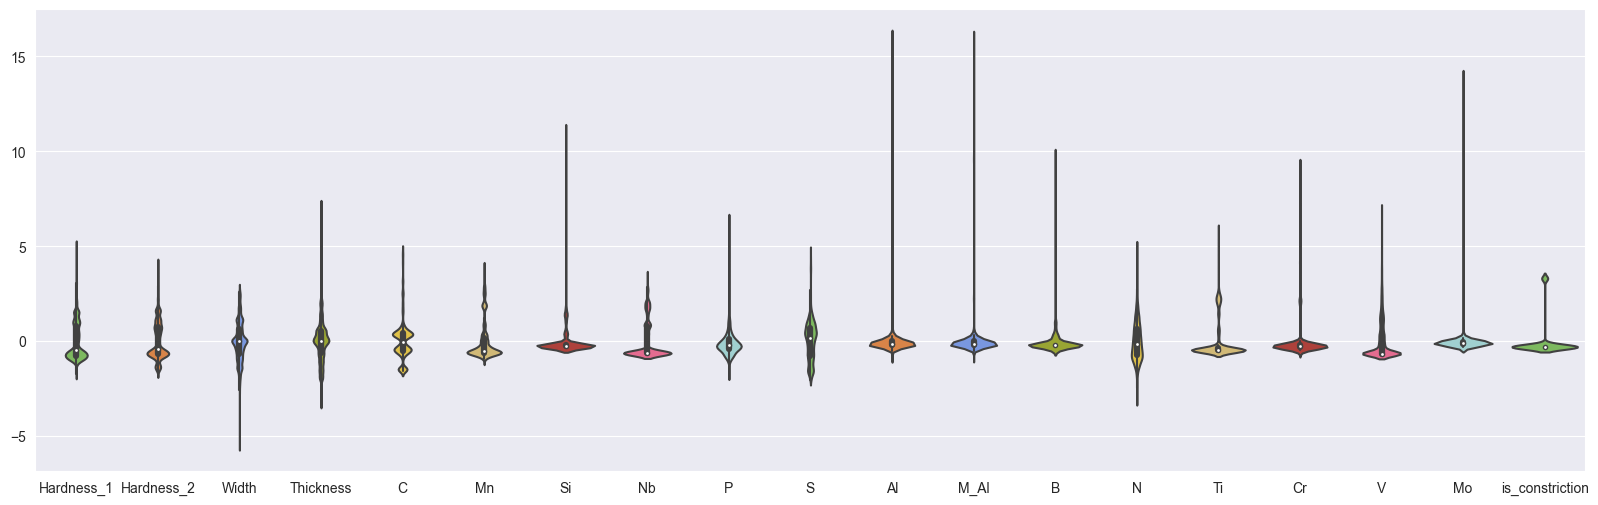

In [19]:
colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
plt.figure(figsize=(20,6))
sns.set_palette("RdBu")
sns.set_style("darkgrid")
sns.violinplot(data=normalized_df,palette=colors_list, alpha=0.8)

In [20]:
print('unique_values:',df['is_constriction'].unique())
print('count_values:',df['is_constriction'].value_counts())

unique_values: [0 1]
count_values: 0    18845
1     1725
Name: is_constriction, dtype: int64


In [21]:
normalized_df.keys()

Index(['Hardness_1', 'Hardness_2', 'Width', 'Thickness', 'C', 'Mn', 'Si', 'Nb',
       'P', 'S', 'Al', 'M_Al', 'B', 'N', 'Ti', 'Cr', 'V', 'Mo',
       'is_constriction'],
      dtype='object')

In [22]:
print(normalized_df['is_constriction'].unique())
print(normalized_df['is_constriction'].value_counts())

[-0.30254217  3.30516362]
-0.302542    18845
 3.305164     1725
Name: is_constriction, dtype: int64


<AxesSubplot: xlabel='is_constriction', ylabel='Width'>

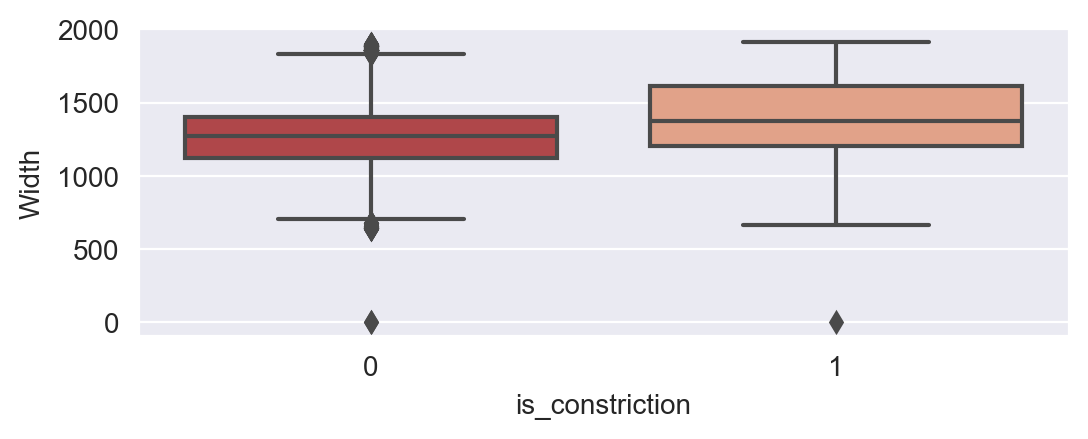

In [23]:
plt.figure(figsize=(6,2),dpi=200)
sns.boxplot(data=df,x='is_constriction',y='Width')

<AxesSubplot: xlabel='is_constriction', ylabel='Width'>

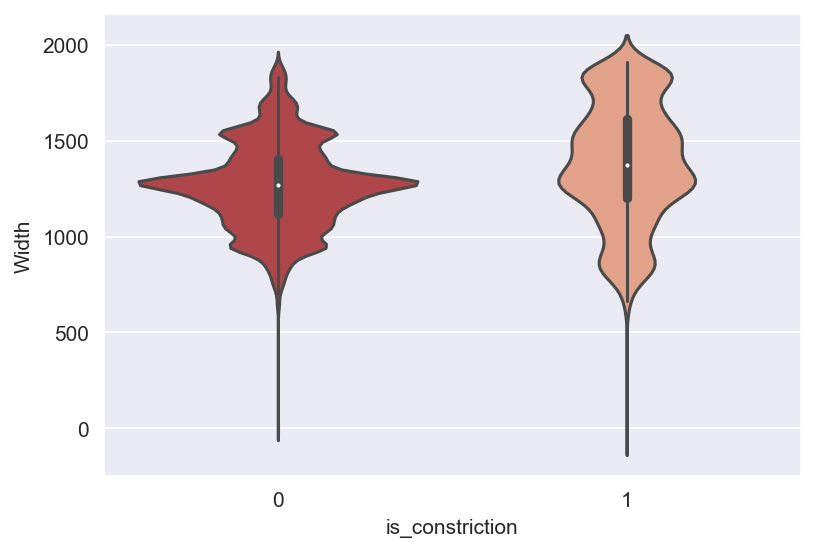

In [24]:
plt.figure(figsize=(6,4),dpi=150)
sns.violinplot(data=df,x='is_constriction',y='Width')

<AxesSubplot: xlabel='is_constriction', ylabel='Thickness'>

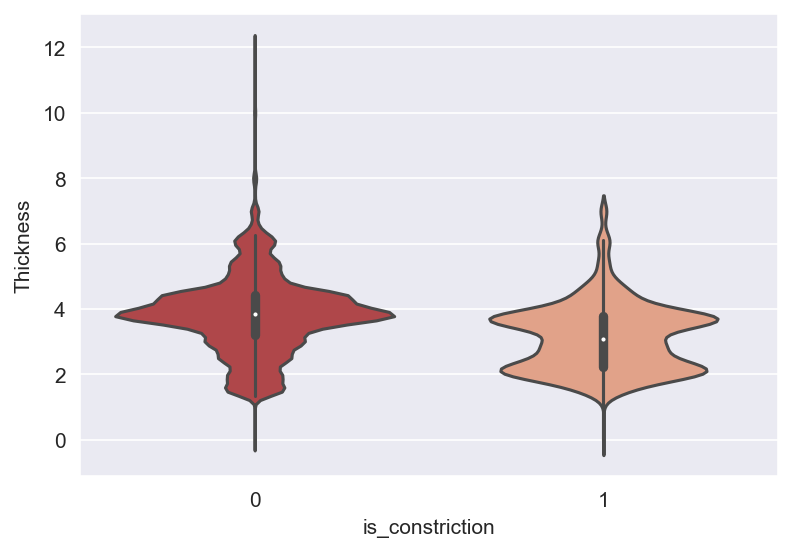

In [25]:
plt.figure(figsize=(6,4),dpi=150)
sns.violinplot(data=df,x='is_constriction',y='Thickness')

In [26]:
# def outliers(df,ft):
#     Q1=df[ft].quantile(0.25)
#     Q3=df[ft].quantile(0.75)
#     IQR = Q3-Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 - 1.5 * IQR

#     ls = df.index[(df[ft] < lower_bound) |(df[ft] > upper_bound)]
#     return ls

In [27]:
# index_list=[]
# for feature in normalized_df:
#        index_list.extend(outliers(normalized_df,feature))

In [28]:
#index_list